                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1343.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          1.37e-283
Time:                        16:05:31   Log-Likelihood:                -3729.2
No. Observations:                1000   AIC:                             7464.
Df Residuals:                     997   BIC:                             7479.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9033      1.32

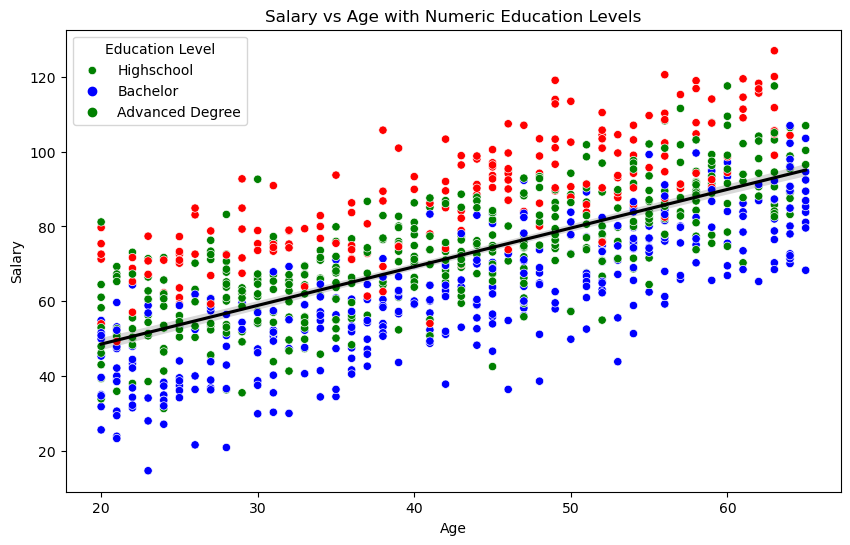

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("salary_data.csv")

# Convert education levels to numeric values
education_mapping = {
    'highschool': 1,
    'bachelor': 2,
    'advanced_degree': 3
}
data['education_numeric'] = data['education'].map(education_mapping)

# Perform linear regression using the numeric education variable
X = data[['age', 'education_numeric']]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term to the regression
y = data['salary']  # Dependent variable

# Create the linear regression model
model = sm.OLS(y, X).fit()

# View the summary of the model
print(model.summary())

# Get the variance-covariance matrix for the model coefficients
vcov_matrix = model.cov_params()
print("Variance-Covariance Matrix of Coefficients (Numeric Education):")
print(vcov_matrix)

# Create a scatter plot of salary vs. age with the numeric education variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary', hue='education_numeric', data=data, palette={1: 'blue', 2: 'green', 3: 'red'})
sns.regplot(x='age', y='salary', data=data, scatter=False, color='black')

# Customizing the plot
plt.title('Salary vs Age with Numeric Education Levels')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Education Level', labels=['Highschool', 'Bachelor', 'Advanced Degree'])

# Show the plot
plt.show()
